<a href="https://colab.research.google.com/github/oroobyaseen/coursera.exercises/blob/gh-pages/Contrast%20_Enhanced_VGG16_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Lec/Train'
valid_path = '/content/drive/MyDrive/Lec/Val'

In [26]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [27]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Lec/Train/*')

In [8]:
folders

['/content/drive/MyDrive/Lec/Train/Glioma',
 '/content/drive/MyDrive/Lec/Train/Pituitary tumor',
 '/content/drive/MyDrive/Lec/Train/Meningioma']

In [28]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [10]:
len(folders)

3

In [29]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [30]:

# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [13]:
from tensorflow.keras.optimizers import Adam

In [31]:
# tell the model what cost and optimization method to use


model.compile(
  loss='categorical_crossentropy',
  optimizer= 'Adam',
  metrics=['accuracy']
)

In [15]:
from skimage import data, img_as_float
from skimage import exposure

In [16]:
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input

In [ ]:
import tensorflow as tf


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import apply_affine_transform
import random

In [18]:
FILL_MODE = 'nearest'

def right_angle_rotate(input_image):
    angle = random.choice([0, 90, 180, 270])
    if angle != 0:
        input_image = apply_affine_transform(
            input_image, theta=angle, fill_mode=FILL_MODE)
    return input_image

In [19]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#adjusted = tf.image.adjust_contrast(224, 224 (2, 98))

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   fill_mode=FILL_MODE,
                                   preprocessing_function=right_angle_rotate, 
                                   #preprocessing_function = equalize_this,
                                   vertical_flip= True,
                                   horizontal_flip = True
)  
    #rescale=1/225,
 
 #   preprocessing_function = preprocess_input)
                    
 

                                   
                                   #rotation_range=40,
                                   #shear_range = 0.2,
                                   #zoom_range = 0.2,
                                   #width_shift_range=0.2,
                                   #height_shift_range=0,
                                   #horizontal_flip = True
                                  

test_datagen = ImageDataGenerator( rescale=1/225)
                                  #preprocessing_function = preprocess_input
                                

In [20]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Lec/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 color_mode='rgb',
                                                  
                                                 class_mode = 'categorical')

Found 2456 images belonging to 3 classes.


In [21]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Lec/Val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                             color_mode='rgb',
                                            class_mode = 'categorical')

Found 616 images belonging to 3 classes.


In [32]:
#@title Default title text
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/30
77/77 [==============================] - 37s 475ms/step - loss: 0.7517 - accuracy: 0.7386 - val_loss: 0.3816 - val_accuracy: 0.8377
Epoch 2/30
77/77 [==============================] - 36s 471ms/step - loss: 0.3133 - accuracy: 0.8717 - val_loss: 0.3390 - val_accuracy: 0.8701
Epoch 3/30
77/77 [==============================] - 36s 473ms/step - loss: 0.2693 - accuracy: 0.8990 - val_loss: 0.4316 - val_accuracy: 0.8312
Epoch 4/30
77/77 [==============================] - 37s 473ms/step - loss: 0.2610 - accuracy: 0.8941 - val_loss: 0.5508 - val_accuracy: 0.8019
Epoch 5/30
77/77 [==============================] - 37s 472ms/step - loss: 0.2541 - accuracy: 0.8990 - val_loss: 0.2373 - val_accuracy: 0.9075
Epoch 6/30
77/77 [==============================] - 36s 467ms/step - loss: 0.1919 - accuracy: 0.9222 - val_loss: 0.3676 - val_accuracy: 0.8620
Epoch 7/30
77/77 [==============================] - 36s 468ms/step - loss: 0.2076 - accuracy: 0.9178 - val_loss: 0.3132 - val_accuracy: 0.8815

In [ ]:
import matplotlib.pyplot as plt

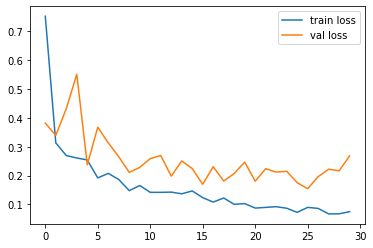

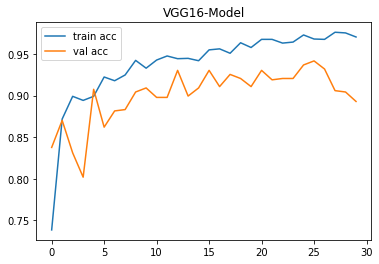

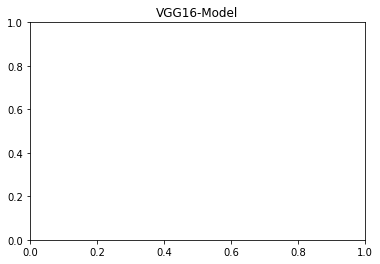

In [33]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
plt.title('VGG16-Model')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')
plt.title('VGG16-Model')
plt.show()

In [34]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg16_co.h5')